# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# Data Preprocessing and Visualisation

In [3]:
Dataset = pd.read_csv('C:/Users/jaiga/Desktop/Air_pollution/Train.csv')
Dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1600 non-null   float64
 1   feature_2  1600 non-null   float64
 2   feature_3  1600 non-null   float64
 3   feature_4  1600 non-null   float64
 4   feature_5  1600 non-null   float64
 5   target     1600 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [5]:
Dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


In [6]:
Dataset.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [7]:
X = Dataset.iloc[:, :-1]
Y = Dataset.iloc[:, -1:]
X = X.values
Y = Y.values

<IPython.core.display.Javascript object>


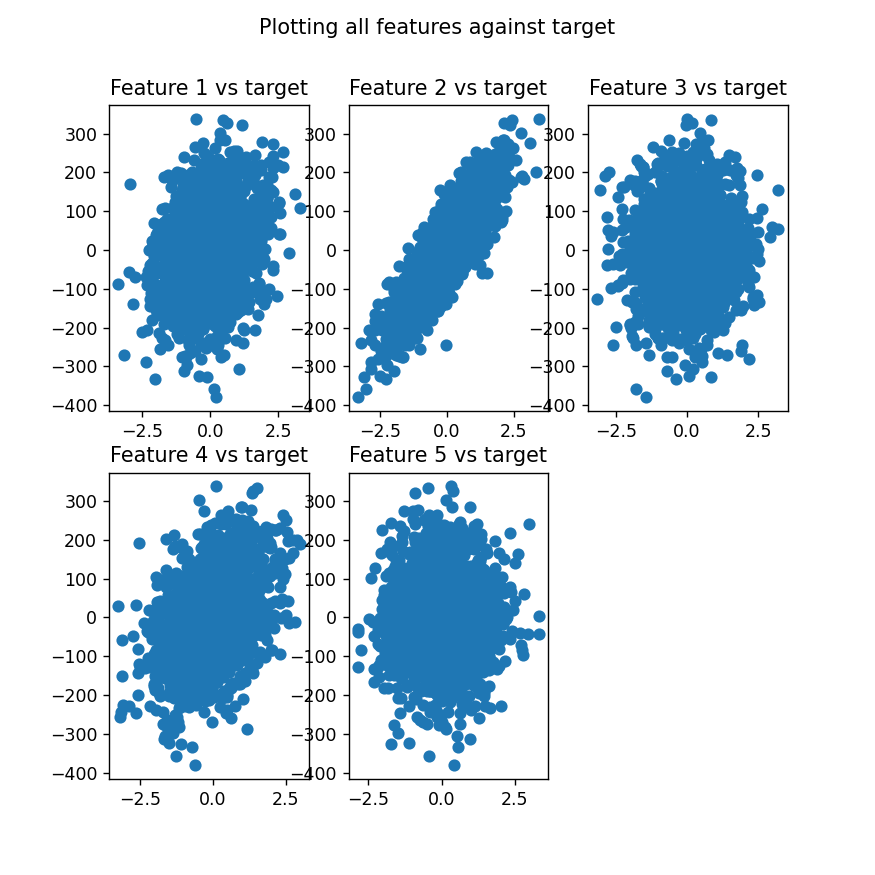

In [8]:
plt.figure(num=1,figsize=(7,7))
plt.suptitle("Plotting all features against target")
n_features = X.shape[1]
for i in range(n_features):
    plt.subplot(2,3,i+1)
    plt.title('Feature '+str(i+1)+' vs target')
    plt.scatter(X[:,i],Y)
plt.show()

<IPython.core.display.Javascript object>


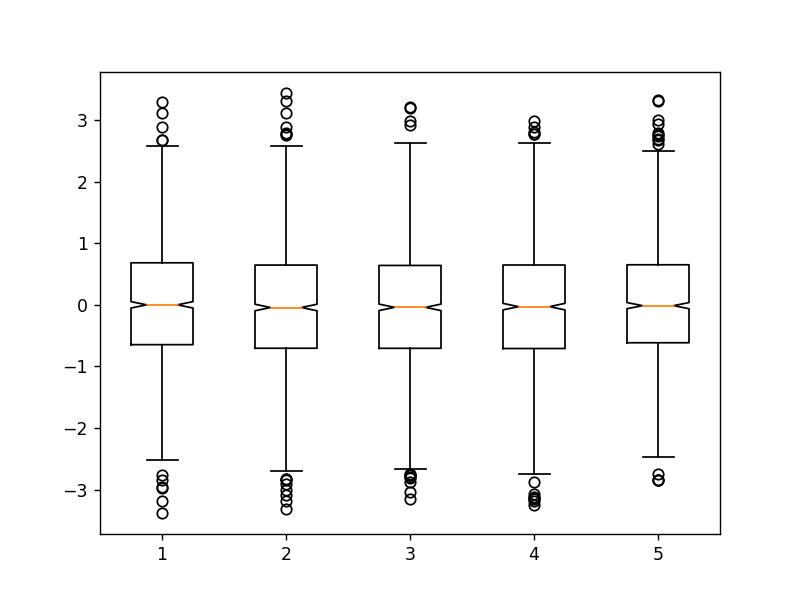

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0f419edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0f41af4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0f44d0a60>,
 'medians': [<matplotlib.lines.Line2D at 0x1e0f41afb80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e0f41afee0>,
 'means': []}

In [9]:
plt.figure(num=2)
plt.boxplot(X, notch = True)

# Using Sklearn to Build a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X, Y) 

LinearRegression()

In [12]:
model.coef_

array([[29.68187118, 92.66247759,  8.28062089, 44.76773522,  2.51916121]])

In [13]:
model.intercept_

array([4.99096674])

In [14]:
model.score(X,Y)

0.9660939669975617

In [19]:
X_test = pd.read_csv('C:/Users/jaiga/Desktop/Air_pollution/Test.csv')
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [20]:
X_test = X_test.values

# Applying The Model on Test Data

In [21]:
Y_test = model.predict(X_test)

In [22]:
Y_test_df = pd.DataFrame(data = Y_test, columns = ['target'])
Y_test_df.index.rename("Id",inplace=True)

In [23]:
Y_test_df.head()

,target
Id,
0,114.583689
1,118.012815
2,-21.739852
3,-43.936899
4,-95.914898


In [24]:
Y_test_df.to_csv("Air_pollution_predictions")